In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import nan
import matplotlib.pyplot as plt

In [2]:

column_template_2 = 'column_heading_template for debt.csv'
path2 = './data_documentation/'
input_file_for_debt = 'debt_df.csv'

In [3]:
column_headings_template_df = pd.read_csv(path2 +column_template_2)

In [4]:
column_headings_for_earnings_summary = column_headings_template_df['VARIABLE NAME'].to_list()
column_heading_df = column_headings_template_df
column_headings_for_earnings_summary

['CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54',
 'PCIP43',
 'PCIP22',
 'PCIP24',
 'PCIP25',
 'PCIP27',
 'PCIP47',
 'PCIP29',
 'PCIP30',
 'PCIP03',
 'PCIP31',
 'PCIP12',
 'PCIP38',
 'PCIP40',
 'PCIP48',
 'PCIP42',
 'PCIP44',
 'PCIP41',
 'PCIP45',
 'PCIP39',
 'PCIP49',
 'PCIP50',
 'SATVR25',


In [5]:
#this input file is ready to go.
filtered_4_year_df = pd.read_csv(path2 + input_file_for_debt, index_col = 0)
filtered_4_year_df = filtered_4_year_df.fillna(0)

In [6]:
#here is where we apply the columns to filter the dataframe.
#don't need this now as the data was fully filtered in the df prep file.
#filtered_4_year_df = filtered_4_year_df[column_headings_for_earnings_summary]

In [7]:
filtered_4_year_df

,CIP01BACHL,CIP04BACHL,CIP05BACHL,CIP26BACHL,CIP52BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP46BACHL,CIP13BACHL,...,PCIP39,PCIP49,PCIP50,DEBT_MDN,MENONLY,WOMENONLY,INEXPFTE,LOCALE,TUITFTE,REGION
0,1,1,0,1,2,0,1,1,0,1,...,0.0000,0.0,0.0237,15000,0,0,5384,12,7413,5
1,0,0,1,1,2,1,0,1,0,1,...,0.0000,0.0,0.0339,15000,0,0,16454,12,13177,5
2,0,0,0,0,2,0,0,0,0,0,...,0.2154,0.0,0.0000,13207,0,0,4206,12,14273,5
3,0,0,0,1,1,1,0,1,0,1,...,0.0000,0.0,0.0380,14000,0,0,9242,12,8677,5
4,0,0,0,1,1,1,0,1,0,1,...,0.0000,0.0,0.0585,18950,0,0,8527,12,10160,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,0,0,0,0,2,2,0,2,0,2,...,0.0000,0.0,0.0000,12500,0,0,494,21,9951,4
6217,0,0,0,1,2,1,0,1,0,1,...,0.0000,0.0,0.0000,13250,0,0,9363,21,7388,3
6221,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.0,0.0000,7585,0,0,13028,42,15304,3
6231,0,0,0,0,1,0,0,1,0,0,...,0.0000,0.0,0.0000,12902,0,0,14582,33,58637,4


In [8]:
filtered_4_year_df['DEBT_MDN']

0       15000
1       15000
2       13207
3       14000
4       18950
        ...  
6216    12500
6217    13250
6221     7585
6231    12902
6243    16534
Name: DEBT_MDN, Length: 1906, dtype: int64

In [9]:
#value for y is mean earning 6 years from enrollment
y = filtered_4_year_df['DEBT_MDN']
y_baseline = y

In [10]:
y

0       15000
1       15000
2       13207
3       14000
4       18950
        ...  
6216    12500
6217    13250
6221     7585
6231    12902
6243    16534
Name: DEBT_MDN, Length: 1906, dtype: int64

In [11]:
#get list of remaining columns to determine which ones still contain some text
column_list = filtered_4_year_df.columns.to_list()

In [12]:
column_list

['CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54',
 'PCIP43',
 'PCIP22',
 'PCIP24',
 'PCIP25',
 'PCIP27',
 'PCIP47',
 'PCIP29',
 'PCIP30',
 'PCIP03',
 'PCIP31',
 'PCIP12',
 'PCIP38',
 'PCIP40',
 'PCIP48',
 'PCIP42',
 'PCIP44',
 'PCIP41',
 'PCIP45',
 'PCIP39',
 'PCIP49',
 'PCIP50',
 'DEBT_MDN',

In [13]:
len(column_list)

83

In [14]:
#filtered_4_year_df.replace(to_replace = 'Dental Hygiene/Hygienist', value = 0, inplace = True)

In [15]:
X = filtered_4_year_df.fillna(0)
filtered_4_year_df = filtered_4_year_df.drop(columns = ['DEBT_MDN'])
X = filtered_4_year_df
X_base_line = X

In [16]:
print(X.shape, y.shape)

(1906, 82) (1906,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# random forest generator classifier
from sklearn.ensemble import RandomForestRegressor


In [19]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.4416515864586983

In [20]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([2.59726920e-04, 1.08231807e-03, 9.60394383e-04, 3.68495752e-03,
       6.38477268e-03, 2.26024495e-03, 1.03728357e-03, 4.17680348e-03,
       6.43890734e-06, 2.50880103e-03, 1.13457132e-03, 1.54563195e-03,
       1.30782799e-03, 1.08097482e-03, 2.91595978e-03, 5.93635870e-03,
       8.78113780e-04, 3.92536345e-03, 1.37763502e-03, 2.77027099e-03,
       7.89377483e-06, 2.06356879e-03, 3.05637958e-04, 5.96463951e-05,
       2.93269737e-03, 1.04038256e-03, 1.37616426e-03, 2.84494233e-04,
       2.47249466e-03, 3.67435833e-03, 1.60558630e-05, 3.16346266e-03,
       2.21794630e-03, 1.11144194e-04, 1.51227039e-03, 4.06053844e-03,
       3.37235482e-04, 4.19374787e-03, 2.40491248e-03, 2.06455576e-02,
       5.20658549e-03, 2.20456951e-02, 3.11249779e-02, 1.65222038e-02,
       1.04087718e-02, 1.80757484e-02, 1.25779494e-04, 1.46430120e-02,
       4.02910431e-03, 8.23570009e-03, 1.59048574e-02, 7.34077014e-03,
       6.35561241e-03, 1.52383849e-02, 7.66669452e-03, 1.59429305e-02,
      

In [21]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, column_list), reverse=True)

[(0.2562791326312533, 'LOCALE'),
 (0.12835791316535577, 'TUITFTE'),
 (0.12191280603083417, 'WOMENONLY'),
 (0.031124977861915176, 'PCIP52'),
 (0.025467538070701706, 'PCIP50'),
 (0.02362170152387685, 'PCIP24'),
 (0.022045695059672202, 'PCIP26'),
 (0.020645557612954966, 'PCIP04'),
 (0.018719833041970453, 'PCIP42'),
 (0.018075748391051912, 'PCIP11'),
 (0.017800720744770494, 'PCIP40'),
 (0.017638040818702384, 'INEXPFTE'),
 (0.01652220377101355, 'PCIP09'),
 (0.01594293049801387, 'PCIP43'),
 (0.015904857440682915, 'PCIP23'),
 (0.01523838489961868, 'PCIP51'),
 (0.01464301199993454, 'PCIP13'),
 (0.013494953459097181, 'PCIP44'),
 (0.01283518531133923, 'PCIP30'),
 (0.012670445752681085, 'PCIP45'),
 (0.011885312258902485, 'PCIP39'),
 (0.01082502521540947, 'PCIP38'),
 (0.010408771782404123, 'PCIP10'),
 (0.00998866320240148, 'PCIP27'),
 (0.00861065258877267, 'PCIP31'),
 (0.008235700089853639, 'PCIP14'),
 (0.007666694524953791, 'PCIP54'),
 (0.007340770142685404, 'PCIP19'),
 (0.006706545972187803, 'PC

In [22]:
#X['IND_RPY_1YR_RT']

In [23]:
column_list_a = X.columns.to_list()

In [24]:
print(X.shape, y.shape)

(1906, 82) (1906,)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
rfa = rf.fit(X_train, y_train)
rfa.score(X_test, y_test)

0.438487011039204

In [27]:
# Random Forests in sklearn will automatically calculate feature importance
importancesa = rfa.feature_importances_
importancesa

array([3.94316716e-04, 1.11470333e-03, 8.80864819e-04, 4.51180050e-03,
       5.98960361e-03, 2.00758378e-03, 6.38219931e-04, 4.41535246e-03,
       2.37487944e-06, 2.72919735e-03, 1.21361440e-03, 1.44912524e-03,
       1.23106872e-03, 1.20962263e-03, 2.96624179e-03, 5.89118361e-03,
       1.11798819e-03, 2.83005476e-03, 1.25592345e-03, 2.68704089e-03,
       5.36511860e-05, 1.89636179e-03, 1.22752617e-04, 2.30775750e-04,
       2.91874773e-03, 1.49148416e-03, 1.46120070e-03, 4.63109951e-04,
       2.38943254e-03, 3.60509486e-03, 1.84934488e-05, 1.85791090e-03,
       1.68993236e-03, 1.24803273e-04, 1.59468212e-03, 2.63196497e-03,
       5.87146021e-04, 3.48680295e-03, 2.12737208e-03, 2.03580471e-02,
       5.78214500e-03, 2.04769253e-02, 3.20454961e-02, 1.80579739e-02,
       1.14370903e-02, 1.96212304e-02, 6.96880982e-05, 1.52291545e-02,
       3.21074391e-03, 7.66589367e-03, 1.57335770e-02, 7.91415073e-03,
       6.30703130e-03, 1.52739926e-02, 8.04063815e-03, 1.78502775e-02,
      

In [28]:
# We can sort the features by their importance
importance_list_a = sorted(zip(rfa.feature_importances_, column_list_a), reverse=True)
importance_list_a

[(0.2567898361987652, 'TUITFTE'),
 (0.1259343144816743, 'REGION'),
 (0.12075047315944086, 'INEXPFTE'),
 (0.03204549609707899, 'PCIP52'),
 (0.02776694875767931, 'PCIP50'),
 (0.023882734480683024, 'PCIP24'),
 (0.02073221067826876, 'PCIP42'),
 (0.02047692531377482, 'PCIP26'),
 (0.020358047094706823, 'PCIP04'),
 (0.01962123042748743, 'PCIP11'),
 (0.01805797388510996, 'PCIP09'),
 (0.017850277529204834, 'PCIP43'),
 (0.01763122172548633, 'LOCALE'),
 (0.0167755145742126, 'PCIP40'),
 (0.0157335770462259, 'PCIP23'),
 (0.015273992571941107, 'PCIP51'),
 (0.015229154537978996, 'PCIP13'),
 (0.012846845882330381, 'PCIP45'),
 (0.012678718052287827, 'PCIP30'),
 (0.011695261855535705, 'PCIP44'),
 (0.011437090258744457, 'PCIP10'),
 (0.011354848225105355, 'PCIP39'),
 (0.01097529111909028, 'PCIP27'),
 (0.010530738324697753, 'PCIP38'),
 (0.008306788027362014, 'PCIP31'),
 (0.008040638154691096, 'PCIP54'),
 (0.007914150728838209, 'PCIP19'),
 (0.007665893670711899, 'PCIP14'),
 (0.0064682376542236275, 'PCIP03')

In [29]:
a_drop_list = []
for tuple in importance_list_a:
    if tuple[0] < 0.0001:
        a_drop_list.append(tuple[1]) 
    print(tuple)

(0.2567898361987652, 'TUITFTE')
(0.1259343144816743, 'REGION')
(0.12075047315944086, 'INEXPFTE')
(0.03204549609707899, 'PCIP52')
(0.02776694875767931, 'PCIP50')
(0.023882734480683024, 'PCIP24')
(0.02073221067826876, 'PCIP42')
(0.02047692531377482, 'PCIP26')
(0.020358047094706823, 'PCIP04')
(0.01962123042748743, 'PCIP11')
(0.01805797388510996, 'PCIP09')
(0.017850277529204834, 'PCIP43')
(0.01763122172548633, 'LOCALE')
(0.0167755145742126, 'PCIP40')
(0.0157335770462259, 'PCIP23')
(0.015273992571941107, 'PCIP51')
(0.015229154537978996, 'PCIP13')
(0.012846845882330381, 'PCIP45')
(0.012678718052287827, 'PCIP30')
(0.011695261855535705, 'PCIP44')
(0.011437090258744457, 'PCIP10')
(0.011354848225105355, 'PCIP39')
(0.01097529111909028, 'PCIP27')
(0.010530738324697753, 'PCIP38')
(0.008306788027362014, 'PCIP31')
(0.008040638154691096, 'PCIP54')
(0.007914150728838209, 'PCIP19')
(0.007665893670711899, 'PCIP14')
(0.0064682376542236275, 'PCIP03')
(0.006307031296019766, 'PCIP16')
(0.005989603610693779, 

In [30]:
a_drop_list

['PCIP46', 'CIP25BACHL', 'PCIP41', 'CIP48BACHL', 'PCIP25', 'CIP46BACHL']

In [31]:
#the a means rev b after the first run of the data.
filtered_4_year_b_df = filtered_4_year_df.copy()
for column_name in a_drop_list:
    filtered_4_year_b_df.drop(columns = column_name, inplace = True)

In [32]:
filtered_4_year_b_df

,CIP01BACHL,CIP04BACHL,CIP05BACHL,CIP26BACHL,CIP52BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP13BACHL,CIP15BACHL,...,PCIP45,PCIP39,PCIP49,PCIP50,MENONLY,WOMENONLY,INEXPFTE,LOCALE,TUITFTE,REGION
0,1,1,0,1,2,0,1,1,1,1,...,0.0355,0.0000,0.0,0.0237,0,0,5384,12,7413,5
1,0,0,1,1,2,1,0,1,1,0,...,0.0315,0.0000,0.0,0.0339,0,0,16454,12,13177,5
2,0,0,0,0,2,0,0,0,0,0,...,0.0000,0.2154,0.0,0.0000,0,0,4206,12,14273,5
3,0,0,0,1,1,1,0,1,1,0,...,0.0242,0.0000,0.0,0.0380,0,0,9242,12,8677,5
4,0,0,0,1,1,1,0,1,1,0,...,0.0138,0.0000,0.0,0.0585,0,0,8527,12,10160,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,0,0,0,0,2,2,0,2,2,0,...,0.0000,0.0000,0.0,0.0000,0,0,494,21,9951,4
6217,0,0,0,1,2,1,0,1,1,2,...,0.0215,0.0000,0.0,0.0000,0,0,9363,21,7388,3
6221,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0,0.0000,0,0,13028,42,15304,3
6231,0,0,0,0,1,0,0,1,0,0,...,0.0000,0.0000,0.0,0.0000,0,0,14582,33,58637,4


In [33]:
X = filtered_4_year_b_df

In [34]:
column_list_b = filtered_4_year_b_df.columns.to_list()

In [35]:
print(X.shape, y.shape)

(1906, 76) (1906,)


In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
rfb = RandomForestRegressor()
rfb = rf.fit(X_train, y_train)
rfb.score(X_test, y_test)

0.4516194935324281

In [38]:
# We can sort the features by their importance
importance_list_b = sorted(zip(rfb.feature_importances_, column_list_b), reverse=True)
importance_list_b

[(0.25808817595715966, 'TUITFTE'),
 (0.1244358753410737, 'REGION'),
 (0.12037689982860507, 'INEXPFTE'),
 (0.030663096297849902, 'PCIP52'),
 (0.027214557671713893, 'PCIP50'),
 (0.023530656659150936, 'PCIP24'),
 (0.023109174795348037, 'PCIP26'),
 (0.019330436790512055, 'PCIP40'),
 (0.019146270589261518, 'PCIP11'),
 (0.018959314641692707, 'PCIP04'),
 (0.018890324627944384, 'PCIP42'),
 (0.018149851592039454, 'PCIP09'),
 (0.017311069047719455, 'LOCALE'),
 (0.016798917578247884, 'PCIP43'),
 (0.015381608879838247, 'PCIP51'),
 (0.014317916028354796, 'PCIP13'),
 (0.013642353566723822, 'PCIP23'),
 (0.013241551260363058, 'PCIP44'),
 (0.013119354250374624, 'PCIP45'),
 (0.012957187436915131, 'PCIP30'),
 (0.012086996933274368, 'PCIP39'),
 (0.011666848495079393, 'PCIP38'),
 (0.011181853398225389, 'PCIP10'),
 (0.010236806102110705, 'PCIP27'),
 (0.008813765875208006, 'PCIP54'),
 (0.008743966612229629, 'PCIP14'),
 (0.007753780307767336, 'PCIP31'),
 (0.006820624431295678, 'PCIP19'),
 (0.00664511233137407

In [39]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
b_drop_list = []
for tuple in importance_list_b:
    if tuple[0] < 0.001:
        b_drop_list.append(tuple[1]) 
    print(tuple)

(0.25808817595715966, 'TUITFTE')
(0.1244358753410737, 'REGION')
(0.12037689982860507, 'INEXPFTE')
(0.030663096297849902, 'PCIP52')
(0.027214557671713893, 'PCIP50')
(0.023530656659150936, 'PCIP24')
(0.023109174795348037, 'PCIP26')
(0.019330436790512055, 'PCIP40')
(0.019146270589261518, 'PCIP11')
(0.018959314641692707, 'PCIP04')
(0.018890324627944384, 'PCIP42')
(0.018149851592039454, 'PCIP09')
(0.017311069047719455, 'LOCALE')
(0.016798917578247884, 'PCIP43')
(0.015381608879838247, 'PCIP51')
(0.014317916028354796, 'PCIP13')
(0.013642353566723822, 'PCIP23')
(0.013241551260363058, 'PCIP44')
(0.013119354250374624, 'PCIP45')
(0.012957187436915131, 'PCIP30')
(0.012086996933274368, 'PCIP39')
(0.011666848495079393, 'PCIP38')
(0.011181853398225389, 'PCIP10')
(0.010236806102110705, 'PCIP27')
(0.008813765875208006, 'PCIP54')
(0.008743966612229629, 'PCIP14')
(0.007753780307767336, 'PCIP31')
(0.006820624431295678, 'PCIP19')
(0.006645112331374073, 'CIP52BACHL')
(0.006540503637705643, 'PCIP03')
(0.0063

In [40]:
#the a means rev c after the first run of the data.
filtered_4_year_c_df = filtered_4_year_b_df.copy()
for column_name in b_drop_list:
    filtered_4_year_c_df.drop(columns = column_name, inplace = True)

In [41]:
X = filtered_4_year_c_df

In [42]:
column_list_c = filtered_4_year_c_df.columns.to_list()

In [43]:
print(X.shape, y.shape)

(1906, 61) (1906,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
rfc = rf.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.45659692480745373

In [46]:
# We can sort the features by their importance
importance_list_c = sorted(zip(rfc.feature_importances_, column_list_c), reverse=True)
importance_list_c

[(0.261263840875558, 'TUITFTE'),
 (0.12553782336102237, 'INEXPFTE'),
 (0.1254499222010349, 'REGION'),
 (0.031471912786998055, 'PCIP52'),
 (0.027398797484506025, 'PCIP50'),
 (0.023726358312204012, 'PCIP24'),
 (0.021246196083084153, 'PCIP26'),
 (0.01920887744031479, 'PCIP42'),
 (0.019076171534100458, 'PCIP40'),
 (0.018608397915942976, 'PCIP04'),
 (0.01828885303840688, 'PCIP11'),
 (0.017177326865415662, 'PCIP09'),
 (0.016066700528813403, 'LOCALE'),
 (0.015725548844633414, 'PCIP43'),
 (0.01543097218138563, 'PCIP23'),
 (0.01517346175570668, 'PCIP51'),
 (0.015148647839415087, 'PCIP13'),
 (0.013387750827887098, 'PCIP39'),
 (0.013036004529496213, 'PCIP45'),
 (0.012952042893730689, 'PCIP30'),
 (0.012647607139158516, 'PCIP44'),
 (0.011609060995103252, 'PCIP38'),
 (0.010367282322223188, 'PCIP10'),
 (0.009954462611954656, 'PCIP27'),
 (0.008808902147981346, 'PCIP14'),
 (0.008389311459738105, 'PCIP19'),
 (0.00825094128770395, 'PCIP54'),
 (0.007584641679036842, 'PCIP31'),
 (0.007181178791375598, 'CIP

In [47]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
c_drop_list = []
for tuple in importance_list_c:
    if tuple[0] < 0.005:
        c_drop_list.append(tuple[1]) 
    print(tuple)

(0.261263840875558, 'TUITFTE')
(0.12553782336102237, 'INEXPFTE')
(0.1254499222010349, 'REGION')
(0.031471912786998055, 'PCIP52')
(0.027398797484506025, 'PCIP50')
(0.023726358312204012, 'PCIP24')
(0.021246196083084153, 'PCIP26')
(0.01920887744031479, 'PCIP42')
(0.019076171534100458, 'PCIP40')
(0.018608397915942976, 'PCIP04')
(0.01828885303840688, 'PCIP11')
(0.017177326865415662, 'PCIP09')
(0.016066700528813403, 'LOCALE')
(0.015725548844633414, 'PCIP43')
(0.01543097218138563, 'PCIP23')
(0.01517346175570668, 'PCIP51')
(0.015148647839415087, 'PCIP13')
(0.013387750827887098, 'PCIP39')
(0.013036004529496213, 'PCIP45')
(0.012952042893730689, 'PCIP30')
(0.012647607139158516, 'PCIP44')
(0.011609060995103252, 'PCIP38')
(0.010367282322223188, 'PCIP10')
(0.009954462611954656, 'PCIP27')
(0.008808902147981346, 'PCIP14')
(0.008389311459738105, 'PCIP19')
(0.00825094128770395, 'PCIP54')
(0.007584641679036842, 'PCIP31')
(0.007181178791375598, 'CIP52BACHL')
(0.006386039309332185, 'PCIP16')
(0.00635599830

In [48]:
#the a means rev d after the first run of the data.
filtered_4_year_d_df = filtered_4_year_c_df.copy()
for column_name in c_drop_list:
    filtered_4_year_d_df.drop(columns = column_name, inplace = True)

In [49]:
X = filtered_4_year_d_df

In [50]:
column_list_d = filtered_4_year_d_df.columns.to_list()

In [51]:
print(X.shape, y.shape)

(1906, 33) (1906,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
rfd = rf.fit(X_train, y_train)
base_prediction  = rfd.score(X_test, y_test)
base_prediction

0.4343666006133207

In [54]:
# We can sort the features by their importance
importance_list_d = sorted(zip(rfd.feature_importances_, column_list_d), reverse=True)
importance_list_d

[(0.26286886893996353, 'TUITFTE'),
 (0.12736884181106906, 'REGION'),
 (0.12589561009877756, 'INEXPFTE'),
 (0.03495199410894016, 'PCIP52'),
 (0.02995320346832303, 'PCIP50'),
 (0.026248515481775692, 'PCIP24'),
 (0.024843066836928582, 'PCIP26'),
 (0.023633656468673776, 'PCIP40'),
 (0.022227221928552976, 'PCIP42'),
 (0.022210464661307994, 'PCIP04'),
 (0.022093331405264895, 'PCIP11'),
 (0.020199718359681144, 'LOCALE'),
 (0.020033669570543255, 'PCIP09'),
 (0.018659708014012757, 'PCIP43'),
 (0.017651683166080047, 'PCIP51'),
 (0.017238679974582855, 'PCIP13'),
 (0.016991140300517814, 'PCIP23'),
 (0.014672318929735823, 'PCIP39'),
 (0.014562650576910882, 'PCIP30'),
 (0.013815284089594768, 'PCIP38'),
 (0.013235060034971288, 'PCIP45'),
 (0.013015178360751, 'PCIP44'),
 (0.011792175196585876, 'PCIP27'),
 (0.011095159723541775, 'PCIP10'),
 (0.009952642468011405, 'PCIP54'),
 (0.009731369740858685, 'PCIP31'),
 (0.009447319932282719, 'PCIP14'),
 (0.008429092564782144, 'PCIP19'),
 (0.00814751440984016, 'P

In [55]:
column_heading_df

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME
0,academics,"Bachelor's degree in Agriculture, Agriculture ...",program.bachelors.agriculture,integer,CIP01BACHL
1,academics,Bachelor's degree in Architecture And Related ...,program.bachelors.architecture,integer,CIP04BACHL
2,academics,"Bachelor's degree in Area, Ethnic, Cultural, G...",program.bachelors.ethnic_cultural_gender,integer,CIP05BACHL
3,academics,Bachelor's degree in Biological And Biomedical...,program.bachelors.biological,integer,CIP26BACHL
4,academics,"Bachelor's degree in Business, Management, Mar...",program.bachelors.business_marketing,integer,CIP52BACHL
...,...,...,...,...,...
260,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.black_2000,float,UG_BLACKNH
261,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.hispanic_2000,float,UG_HISPOLD
262,student,Total share of enrollment of undergraduate stu...,demographics.non_resident_aliens_2000,float,UG_NRA
263,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.white_2000,float,UG_WHITENH


In [56]:
random_forest_summary_df = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [57]:
variable_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]

In [58]:
for tuple in importance_list_d:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df = random_forest_summary_df.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.26286886893996353
TUITFTE
0.12736884181106906
REGION
0.12589561009877756
INEXPFTE
0.03495199410894016
PCIP52
0.02995320346832303
PCIP50
0.026248515481775692
PCIP24
0.024843066836928582
PCIP26
0.023633656468673776
PCIP40
0.022227221928552976
PCIP42
0.022210464661307994
PCIP04
0.022093331405264895
PCIP11
0.020199718359681144
LOCALE
0.020033669570543255
PCIP09
0.018659708014012757
PCIP43
0.017651683166080047
PCIP51
0.017238679974582855
PCIP13
0.016991140300517814
PCIP23
0.014672318929735823
PCIP39
0.014562650576910882
PCIP30
0.013815284089594768
PCIP38
0.013235060034971288
PCIP45
0.013015178360751
PCIP44
0.011792175196585876
PCIP27
0.011095159723541775
PCIP10
0.009952642468011405
PCIP54
0.009731369740858685
PCIP31
0.009447319932282719
PCIP14
0.008429092564782144
PCIP19
0.00814751440984016
PCIP16
0.008141020192101578
CIP52BACHL
0.007810131878097375
PCIP03
0.007477627146742626
CIP51BACHL
0.005606080160196795
PCIP05


In [59]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,TUITFTE,0.262869,tuition_revenue_per_fte,235 Net tuition revenue per full-time equiv...,"235 school Name: dev-category, dtype: object"
1,REGION,0.127369,region_id,237 Region (IPEDS) Name: NAME OF DATA ELEME...,"237 school Name: dev-category, dtype: object"
2,INEXPFTE,0.125896,instructional_expenditure_per_fte,233 Instructional expenditures per full-tim...,"233 school Name: dev-category, dtype: object"
3,PCIP52,0.034952,program_percentage.business_marketing,42 Percentage of degrees awarded in Busines...,"42 academics Name: dev-category, dtype: object"
4,PCIP50,0.029953,program_percentage.visual_performing,75 Percentage of degrees awarded in Visual ...,"75 academics Name: dev-category, dtype: object"
5,PCIP24,0.026249,program_percentage.humanities,57 Percentage of degrees awarded in Liberal...,"57 academics Name: dev-category, dtype: object"
6,PCIP26,0.024843,program_percentage.biological,41 Percentage of degrees awarded in Biologi...,"41 academics Name: dev-category, dtype: object"
7,PCIP40,0.023634,program_percentage.physical_science,67 Percentage of degrees awarded in Physica...,"67 academics Name: dev-category, dtype: object"
8,PCIP42,0.022227,program_percentage.psychology,69 Percentage of degrees awarded in Psychol...,"69 academics Name: dev-category, dtype: object"
9,PCIP04,0.022210,program_percentage.architecture,39 Percentage of degrees awarded in Archite...,"39 academics Name: dev-category, dtype: object"


In [60]:
random_forest_summary_df['when_dropped'] = 0
random_forest_summary_df['base_prediction_score'] = base_prediction
random_forest_summary_df['difference'] = 0

In [61]:
filtered_4_year_e_df = filtered_4_year_d_df.copy()
for importance_variable in random_forest_summary_df.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_e_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping PCIP52
dropping PCIP50
dropping PCIP24
dropping PCIP26
dropping PCIP40
dropping PCIP42
dropping PCIP04
dropping PCIP11
dropping LOCALE
dropping PCIP09
dropping PCIP43
dropping PCIP51
dropping PCIP13
dropping PCIP23
dropping PCIP39
dropping PCIP30
dropping PCIP38
dropping PCIP44
dropping PCIP27
dropping PCIP10
dropping PCIP54
dropping PCIP31
dropping PCIP14
dropping PCIP19
dropping PCIP05


In [62]:
filtered_4_year_e_df

,CIP52BACHL,CIP51BACHL,PCIP16,PCIP03,PCIP45,INEXPFTE,TUITFTE,REGION
0,2,0,0.0000,0.0237,0.0355,5384,7413,5
1,2,2,0.0040,0.0000,0.0315,16454,13177,5
2,2,0,0.0000,0.0000,0.0000,4206,14273,5
3,1,2,0.0170,0.0000,0.0242,9242,8677,5
4,1,1,0.0000,0.0000,0.0138,8527,10160,5
...,...,...,...,...,...,...,...,...
6216,2,2,0.0000,0.0000,0.0000,494,9951,4
6217,2,2,0.0049,0.0000,0.0215,9363,7388,3
6221,0,0,0.0000,0.0000,0.0000,13028,15304,3
6231,1,1,0.0000,0.0000,0.0000,14582,58637,4


In [63]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category,when_dropped,base_prediction_score,difference
0,TUITFTE,0.262869,tuition_revenue_per_fte,235 Net tuition revenue per full-time equiv...,"235 school Name: dev-category, dtype: object",0.393696,0.434367,0.040670
1,REGION,0.127369,region_id,237 Region (IPEDS) Name: NAME OF DATA ELEME...,"237 school Name: dev-category, dtype: object",0.356852,0.434367,0.077514
2,INEXPFTE,0.125896,instructional_expenditure_per_fte,233 Instructional expenditures per full-tim...,"233 school Name: dev-category, dtype: object",0.376441,0.434367,0.057926
3,PCIP52,0.034952,program_percentage.business_marketing,42 Percentage of degrees awarded in Busines...,"42 academics Name: dev-category, dtype: object",0.461679,0.434367,-0.027313
4,PCIP50,0.029953,program_percentage.visual_performing,75 Percentage of degrees awarded in Visual ...,"75 academics Name: dev-category, dtype: object",0.450781,0.434367,-0.016414
5,PCIP24,0.026249,program_percentage.humanities,57 Percentage of degrees awarded in Liberal...,"57 academics Name: dev-category, dtype: object",0.444942,0.434367,-0.010575
6,PCIP26,0.024843,program_percentage.biological,41 Percentage of degrees awarded in Biologi...,"41 academics Name: dev-category, dtype: object",0.443937,0.434367,-0.009570
7,PCIP40,0.023634,program_percentage.physical_science,67 Percentage of degrees awarded in Physica...,"67 academics Name: dev-category, dtype: object",0.460580,0.434367,-0.026214
8,PCIP42,0.022227,program_percentage.psychology,69 Percentage of degrees awarded in Psychol...,"69 academics Name: dev-category, dtype: object",0.444916,0.434367,-0.010550
9,PCIP04,0.022210,program_percentage.architecture,39 Percentage of degrees awarded in Archite...,"39 academics Name: dev-category, dtype: object",0.441524,0.434367,-0.007158


In [64]:
column_list_e = filtered_4_year_e_df.columns.to_list()


In [65]:
column_list_e

['CIP52BACHL',
 'CIP51BACHL',
 'PCIP16',
 'PCIP03',
 'PCIP45',
 'INEXPFTE',
 'TUITFTE',
 'REGION']

In [66]:
X = filtered_4_year_e_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfe = rf.fit(X_train, y_train)
new_base_prediction  = rfe.score(X_test, y_test)
new_base_prediction

0.4266321290866307

In [67]:
# We can sort the features by their importance
importance_list_e = sorted(zip(rfe.feature_importances_, column_list_e), reverse=True)
importance_list_e

[(0.36938958066325334, 'TUITFTE'),
 (0.25525625336115076, 'INEXPFTE'),
 (0.1653752305782775, 'REGION'),
 (0.07221678731594783, 'PCIP45'),
 (0.03943497253637131, 'PCIP16'),
 (0.03596434210947827, 'CIP52BACHL'),
 (0.031208812504488186, 'CIP51BACHL'),
 (0.031154020931032825, 'PCIP03')]

In [68]:
random_forest_summary_df_2 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [69]:
for tuple in importance_list_e:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_2 = random_forest_summary_df_2.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.36938958066325334
TUITFTE
0.25525625336115076
INEXPFTE
0.1653752305782775
REGION
0.07221678731594783
PCIP45
0.03943497253637131
PCIP16
0.03596434210947827
CIP52BACHL
0.031208812504488186
CIP51BACHL
0.031154020931032825
PCIP03


In [70]:
random_forest_summary_df_2

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,TUITFTE,0.369390,tuition_revenue_per_fte,235 Net tuition revenue per full-time equiv...,"235 school Name: dev-category, dtype: object"
1,INEXPFTE,0.255256,instructional_expenditure_per_fte,233 Instructional expenditures per full-tim...,"233 school Name: dev-category, dtype: object"
2,REGION,0.165375,region_id,237 Region (IPEDS) Name: NAME OF DATA ELEME...,"237 school Name: dev-category, dtype: object"
3,PCIP45,0.072217,program_percentage.social_science,72 Percentage of degrees awarded in Social ...,"72 academics Name: dev-category, dtype: object"
4,PCIP16,0.039435,program_percentage.language,52 Percentage of degrees awarded in Foreign...,"52 academics Name: dev-category, dtype: object"
5,CIP52BACHL,0.035964,program.bachelors.business_marketing,"4 Bachelor's degree in Business, Management...","4 academics Name: dev-category, dtype: object"
6,CIP51BACHL,0.031209,program.bachelors.health,15 Bachelor's degree in Health Professions ...,"15 academics Name: dev-category, dtype: object"
7,PCIP03,0.031154,program_percentage.resources,63 Percentage of degrees awarded in Natural...,"63 academics Name: dev-category, dtype: object"


In [71]:
random_forest_summary_df_2['when_dropped'] = 0
random_forest_summary_df_2['base_prediction_score'] = new_base_prediction
random_forest_summary_df_2['difference'] = 0

In [72]:
filtered_4_year_f_df = filtered_4_year_e_df.copy()
for importance_variable in random_forest_summary_df_2.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < -0.1:
        filtered_4_year_f_df.drop(columns = importance_variable, inplace = True)
        print('difference', difference)
        print('dropping', importance_variable)

In [73]:
filtered_4_year_f_df

,CIP52BACHL,CIP51BACHL,PCIP16,PCIP03,PCIP45,INEXPFTE,TUITFTE,REGION
0,2,0,0.0000,0.0237,0.0355,5384,7413,5
1,2,2,0.0040,0.0000,0.0315,16454,13177,5
2,2,0,0.0000,0.0000,0.0000,4206,14273,5
3,1,2,0.0170,0.0000,0.0242,9242,8677,5
4,1,1,0.0000,0.0000,0.0138,8527,10160,5
...,...,...,...,...,...,...,...,...
6216,2,2,0.0000,0.0000,0.0000,494,9951,4
6217,2,2,0.0049,0.0000,0.0215,9363,7388,3
6221,0,0,0.0000,0.0000,0.0000,13028,15304,3
6231,1,1,0.0000,0.0000,0.0000,14582,58637,4


In [74]:
X = filtered_4_year_f_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rff = rf.fit(X_train, y_train)
new_base_prediction  = rff.score(X_test, y_test)
new_base_prediction

0.44746531255303434

In [75]:
column_list_f = filtered_4_year_f_df.columns.to_list()

In [76]:
# We can sort the features by their importance
importance_list_f = sorted(zip(rff.feature_importances_, column_list_f), reverse=True)
importance_list_f

[(0.37412210859725953, 'TUITFTE'),
 (0.2517234032031917, 'INEXPFTE'),
 (0.16448835472733098, 'REGION'),
 (0.07269928888966957, 'PCIP45'),
 (0.03926180834638586, 'PCIP16'),
 (0.035342807483751314, 'CIP52BACHL'),
 (0.03129883600931585, 'PCIP03'),
 (0.03106339274309529, 'CIP51BACHL')]

In [77]:
random_forest_summary_df_3 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [78]:
for tuple in importance_list_f:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_3 = random_forest_summary_df_3.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.37412210859725953
TUITFTE
0.2517234032031917
INEXPFTE
0.16448835472733098
REGION
0.07269928888966957
PCIP45
0.03926180834638586
PCIP16
0.035342807483751314
CIP52BACHL
0.03129883600931585
PCIP03
0.03106339274309529
CIP51BACHL


In [79]:
random_forest_summary_df_3

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,TUITFTE,0.374122,tuition_revenue_per_fte,235 Net tuition revenue per full-time equiv...,"235 school Name: dev-category, dtype: object"
1,INEXPFTE,0.251723,instructional_expenditure_per_fte,233 Instructional expenditures per full-tim...,"233 school Name: dev-category, dtype: object"
2,REGION,0.164488,region_id,237 Region (IPEDS) Name: NAME OF DATA ELEME...,"237 school Name: dev-category, dtype: object"
3,PCIP45,0.072699,program_percentage.social_science,72 Percentage of degrees awarded in Social ...,"72 academics Name: dev-category, dtype: object"
4,PCIP16,0.039262,program_percentage.language,52 Percentage of degrees awarded in Foreign...,"52 academics Name: dev-category, dtype: object"
5,CIP52BACHL,0.035343,program.bachelors.business_marketing,"4 Bachelor's degree in Business, Management...","4 academics Name: dev-category, dtype: object"
6,PCIP03,0.031299,program_percentage.resources,63 Percentage of degrees awarded in Natural...,"63 academics Name: dev-category, dtype: object"
7,CIP51BACHL,0.031063,program.bachelors.health,15 Bachelor's degree in Health Professions ...,"15 academics Name: dev-category, dtype: object"


In [80]:
#let's drop the 3 variables that reference pell

In [81]:
filtered_4_year_g_df = filtered_4_year_f_df
#filtered_4_year_g_df = filtered_4_year_f_df.drop(columns = ['NOPELL_YR6_N'])

In [82]:
X = filtered_4_year_g_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfg = rf.fit(X_train, y_train)
new_base_prediction  = rfg.score(X_test, y_test)
new_base_prediction

0.4493602483358012

In [83]:
column_list_g = filtered_4_year_g_df.columns.to_list()

In [84]:
# We can sort the features by their importance
importance_list_g = sorted(zip(rfg.feature_importances_, column_list_g), reverse=True)
importance_list_g

[(0.37331571972251637, 'TUITFTE'),
 (0.2521315261320688, 'INEXPFTE'),
 (0.16492042013018646, 'REGION'),
 (0.07539680003361172, 'PCIP45'),
 (0.038063830565637696, 'PCIP16'),
 (0.03471359006938129, 'CIP52BACHL'),
 (0.03135684718818199, 'PCIP03'),
 (0.030101266158415615, 'CIP51BACHL')]

In [85]:
random_forest_summary_df_4 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [86]:
for tuple in importance_list_g:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_4 = random_forest_summary_df_4.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.37331571972251637
TUITFTE
0.2521315261320688
INEXPFTE
0.16492042013018646
REGION
0.07539680003361172
PCIP45
0.038063830565637696
PCIP16
0.03471359006938129
CIP52BACHL
0.03135684718818199
PCIP03
0.030101266158415615
CIP51BACHL


In [87]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,TUITFTE,0.373316,tuition_revenue_per_fte,235 Net tuition revenue per full-time equiv...,"235 school Name: dev-category, dtype: object"
1,INEXPFTE,0.252132,instructional_expenditure_per_fte,233 Instructional expenditures per full-tim...,"233 school Name: dev-category, dtype: object"
2,REGION,0.164920,region_id,237 Region (IPEDS) Name: NAME OF DATA ELEME...,"237 school Name: dev-category, dtype: object"
3,PCIP45,0.075397,program_percentage.social_science,72 Percentage of degrees awarded in Social ...,"72 academics Name: dev-category, dtype: object"
4,PCIP16,0.038064,program_percentage.language,52 Percentage of degrees awarded in Foreign...,"52 academics Name: dev-category, dtype: object"
5,CIP52BACHL,0.034714,program.bachelors.business_marketing,"4 Bachelor's degree in Business, Management...","4 academics Name: dev-category, dtype: object"
6,PCIP03,0.031357,program_percentage.resources,63 Percentage of degrees awarded in Natural...,"63 academics Name: dev-category, dtype: object"
7,CIP51BACHL,0.030101,program.bachelors.health,15 Bachelor's degree in Health Professions ...,"15 academics Name: dev-category, dtype: object"


In [88]:
random_forest_summary_df_4.to_csv(path2 + 'random_forest_major_earnings_summary_table.csv')

In [89]:
rfg.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [90]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#impurity decrease
impurity_decrease = [0, 1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_impurity_decrease' : impurity_decrease,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'oob_score': [True, False]}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'min_impurity_decrease': [0, 1, 5, 10],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [91]:
rf_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid, cv = 3, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [92]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [93]:
rf_random.score(X_test, y_test)

0.4470520162769059

In [94]:
rf_random.best_params_

{'oob_score': False,
 'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 10,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [95]:
#OK so lets try a linear model too.  Lasso regression
#let's reset X back to the beginning when all the columns were there.


In [96]:
X = X_base_line
y = y_baseline

In [97]:
y

0       15000
1       15000
2       13207
3       14000
4       18950
        ...  
6216    12500
6217    13250
6221     7585
6231    12902
6243    16534
Name: DEBT_MDN, Length: 1906, dtype: int64

In [98]:
X

,CIP01BACHL,CIP04BACHL,CIP05BACHL,CIP26BACHL,CIP52BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP46BACHL,CIP13BACHL,...,PCIP45,PCIP39,PCIP49,PCIP50,MENONLY,WOMENONLY,INEXPFTE,LOCALE,TUITFTE,REGION
0,1,1,0,1,2,0,1,1,0,1,...,0.0355,0.0000,0.0,0.0237,0,0,5384,12,7413,5
1,0,0,1,1,2,1,0,1,0,1,...,0.0315,0.0000,0.0,0.0339,0,0,16454,12,13177,5
2,0,0,0,0,2,0,0,0,0,0,...,0.0000,0.2154,0.0,0.0000,0,0,4206,12,14273,5
3,0,0,0,1,1,1,0,1,0,1,...,0.0242,0.0000,0.0,0.0380,0,0,9242,12,8677,5
4,0,0,0,1,1,1,0,1,0,1,...,0.0138,0.0000,0.0,0.0585,0,0,8527,12,10160,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,0,0,0,0,2,2,0,2,0,2,...,0.0000,0.0000,0.0,0.0000,0,0,494,21,9951,4
6217,0,0,0,1,2,1,0,1,0,1,...,0.0215,0.0000,0.0,0.0000,0,0,9363,21,7388,3
6221,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0,0.0000,0,0,13028,42,15304,3
6231,0,0,0,0,1,0,0,1,0,0,...,0.0000,0.0000,0.0,0.0000,0,0,14582,33,58637,4


In [99]:
columns = X.columns.to_list()

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [101]:
X_train

,CIP01BACHL,CIP04BACHL,CIP05BACHL,CIP26BACHL,CIP52BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP46BACHL,CIP13BACHL,...,PCIP45,PCIP39,PCIP49,PCIP50,MENONLY,WOMENONLY,INEXPFTE,LOCALE,TUITFTE,REGION
1334,0,0,0,1,1,0,0,0,0,1,...,0.0000,0.0303,0.0,0.0000,0,0,8363,11,14993,5
3164,0,0,1,1,2,1,0,0,0,1,...,0.0000,0.0000,0.0,0.0000,0,0,6543,33,15055,4
3632,0,0,1,1,1,1,0,1,0,1,...,0.1089,0.0299,0.0,0.0825,0,0,12413,11,21061,8
2829,0,0,0,1,1,0,0,0,0,1,...,0.0000,0.0000,0.0,0.0000,0,0,11013,21,13171,2
4225,0,0,0,0,2,0,0,0,0,0,...,0.2326,0.0000,0.0,0.0000,0,0,24666,13,53753,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0,0,0,1,1,0,0,1,0,1,...,0.0000,0.0000,0.0,0.0000,0,0,12562,11,1845,2
5288,0,0,0,0,2,0,0,0,0,0,...,0.0000,0.0833,0.0,0.0000,0,0,1595,11,6115,4
2620,1,0,0,1,1,1,0,0,0,1,...,0.0064,0.0000,0.0,0.0321,0,0,5971,21,11579,3
665,0,0,1,1,1,1,0,1,0,1,...,0.1644,0.0000,0.0,0.0400,0,0,11338,12,5766,5


In [102]:
X_train.shape

(1429, 82)

In [103]:
y_train.shape

(1429,)

In [104]:
y_train = y_train.ravel().reshape(-1,1)
y_train

array([[15000],
       [13905],
       [19187],
       ...,
       [15250],
       [17500],
       [11169]], dtype=int64)

In [105]:
X_train

,CIP01BACHL,CIP04BACHL,CIP05BACHL,CIP26BACHL,CIP52BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP46BACHL,CIP13BACHL,...,PCIP45,PCIP39,PCIP49,PCIP50,MENONLY,WOMENONLY,INEXPFTE,LOCALE,TUITFTE,REGION
1334,0,0,0,1,1,0,0,0,0,1,...,0.0000,0.0303,0.0,0.0000,0,0,8363,11,14993,5
3164,0,0,1,1,2,1,0,0,0,1,...,0.0000,0.0000,0.0,0.0000,0,0,6543,33,15055,4
3632,0,0,1,1,1,1,0,1,0,1,...,0.1089,0.0299,0.0,0.0825,0,0,12413,11,21061,8
2829,0,0,0,1,1,0,0,0,0,1,...,0.0000,0.0000,0.0,0.0000,0,0,11013,21,13171,2
4225,0,0,0,0,2,0,0,0,0,0,...,0.2326,0.0000,0.0,0.0000,0,0,24666,13,53753,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0,0,0,1,1,0,0,1,0,1,...,0.0000,0.0000,0.0,0.0000,0,0,12562,11,1845,2
5288,0,0,0,0,2,0,0,0,0,0,...,0.0000,0.0833,0.0,0.0000,0,0,1595,11,6115,4
2620,1,0,0,1,1,1,0,0,0,1,...,0.0064,0.0000,0.0,0.0321,0,0,5971,21,11579,3
665,0,0,1,1,1,1,0,1,0,1,...,0.1644,0.0000,0.0,0.0400,0,0,11338,12,5766,5


In [106]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)

In [107]:
X_train

,CIP01BACHL,CIP04BACHL,CIP05BACHL,CIP26BACHL,CIP52BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP46BACHL,CIP13BACHL,...,PCIP45,PCIP39,PCIP49,PCIP50,MENONLY,WOMENONLY,INEXPFTE,LOCALE,TUITFTE,REGION
1334,0,0,0,1,1,0,0,0,0,1,...,0.0000,0.0303,0.0,0.0000,0,0,8363,11,14993,5
3164,0,0,1,1,2,1,0,0,0,1,...,0.0000,0.0000,0.0,0.0000,0,0,6543,33,15055,4
3632,0,0,1,1,1,1,0,1,0,1,...,0.1089,0.0299,0.0,0.0825,0,0,12413,11,21061,8
2829,0,0,0,1,1,0,0,0,0,1,...,0.0000,0.0000,0.0,0.0000,0,0,11013,21,13171,2
4225,0,0,0,0,2,0,0,0,0,0,...,0.2326,0.0000,0.0,0.0000,0,0,24666,13,53753,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0,0,0,1,1,0,0,1,0,1,...,0.0000,0.0000,0.0,0.0000,0,0,12562,11,1845,2
5288,0,0,0,0,2,0,0,0,0,0,...,0.0000,0.0833,0.0,0.0000,0,0,1595,11,6115,4
2620,1,0,0,1,1,1,0,0,0,1,...,0.0064,0.0000,0.0,0.0321,0,0,5971,21,11579,3
665,0,0,1,1,1,1,0,1,0,1,...,0.1644,0.0000,0.0,0.0400,0,0,11338,12,5766,5


In [108]:
X_test

,CIP01BACHL,CIP04BACHL,CIP05BACHL,CIP26BACHL,CIP52BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP46BACHL,CIP13BACHL,...,PCIP45,PCIP39,PCIP49,PCIP50,MENONLY,WOMENONLY,INEXPFTE,LOCALE,TUITFTE,REGION
2894,0,0,1,1,1,0,0,1,0,0,...,0.2360,0.0000,0.0,0.0288,0,0,22133,13,30199,2
410,0,0,0,1,2,1,0,1,0,1,...,0.0749,0.0112,0.0,0.0369,0,0,8576,11,21015,8
809,0,0,0,0,2,0,0,2,0,0,...,0.0000,0.0000,0.0,0.0000,0,0,3180,11,13790,5
3241,0,0,1,1,1,0,0,1,0,1,...,0.2154,0.0000,0.0,0.0396,0,0,15554,11,18944,5
4701,0,0,0,1,1,0,0,0,0,1,...,0.0000,0.0000,0.0,0.0159,0,0,5174,41,3599,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0,0,0,0,2,0,0,2,0,2,...,0.0000,0.0000,0.0,0.0113,0,0,2434,13,12148,5
1290,0,0,0,0,1,1,0,0,0,1,...,0.0182,0.0000,0.0,0.0803,0,0,8557,11,17049,5
1436,0,0,0,1,2,1,0,1,0,1,...,0.0000,0.0000,0.0,0.0562,0,0,10909,41,16453,2
1051,0,0,1,1,0,1,0,1,0,1,...,0.1572,0.0000,0.0,0.0306,0,0,12291,32,12231,3


In [109]:
y_test = y_test.ravel().reshape(-1,1)
y_test

array([[19000],
       [19500],
       [12695],
       [19500],
       [12574],
       [10092],
       [14495],
       [23750],
       [ 9500],
       [18500],
       [17838],
       [ 4500],
       [14000],
       [19125],
       [15622],
       [12274],
       [ 8009],
       [15000],
       [20500],
       [17500],
       [12750],
       [25000],
       [20000],
       [14166],
       [20500],
       [ 7364],
       [19474],
       [15502],
       [17125],
       [15000],
       [20500],
       [18000],
       [14125],
       [19500],
       [13000],
       [17730],
       [19500],
       [15000],
       [15900],
       [18500],
       [19500],
       [11490],
       [18822],
       [21837],
       [20000],
       [14000],
       [15760],
       [24708],
       [12383],
       [17750],
       [20500],
       [16750],
       [15000],
       [16000],
       [16750],
       [18750],
       [20280],
       [14000],
       [14250],
       [17750],
       [12375],
       [24500],
       [

In [110]:
X_train = X_scaler.transform(X_train)
#y_train =  y_scaler.transform(y_train)
X_test =  X_scaler.transform(X_test)
#y_test = y_scaler.transform(y_test)

In [111]:
from sklearn.linear_model import Lasso
model = Lasso( max_iter = 20000, tol = .1)

In [112]:

lasso_a = model.fit(X_train, y_train.ravel())
lasso_prediction  = model.score(X_test, y_test.ravel())
lasso_prediction

-0.45969900832158134

In [113]:
pred_train_lasso = model.predict(X_train)
pred_test_lasso = model.predict(X_test)

In [114]:
y_train

array([[15000],
       [13905],
       [19187],
       ...,
       [15250],
       [17500],
       [11169]], dtype=int64)

In [115]:
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

3823.9946872725045
0.34735808931917345
5665.783184777886
-0.4596990083215813


In [116]:
lasso_a.coef_

array([-1.21288034e+02, -2.08276758e+03,  3.51072889e+02, -1.56892779e+03,
       -1.50462821e+03,  5.16902229e+02,  2.13075454e+02,  1.09786588e+02,
       -0.00000000e+00, -7.12715873e+02, -5.56631834e+02,  4.25311908e+02,
        0.00000000e+00, -1.08097123e+03,  1.08845917e+03, -8.31339561e+00,
        8.95610611e+02, -8.26584586e+02, -9.94160026e+02,  1.00219250e+02,
       -4.85403573e+02, -9.07606050e+01, -4.96425072e+02, -6.60885792e+02,
        2.23720277e+02,  9.58956631e+02,  3.87145180e+02, -1.05334755e+03,
        1.26077208e+03,  2.18387520e+03,  1.84519675e+03, -4.37679026e+02,
       -0.00000000e+00, -6.28689605e+02,  8.02064331e+02,  1.30954762e+03,
       -3.58154414e+02,  2.24096756e+02, -1.79620507e+03,  1.63443326e+04,
       -5.86933050e+03, -7.45010021e+01,  8.03069933e+02,  2.98208735e+03,
        9.00137519e+03, -3.68199471e+03, -8.77665689e+03, -0.00000000e+00,
        1.06597871e+03,  4.21743885e+03,  2.78655481e+03,  9.81561514e+03,
       -0.00000000e+00,  

In [117]:
df_coef = pd.DataFrame({'coef' : lasso_a.coef_,'abs(coef_)': abs(lasso_a.coef_), 'name': columns})
df_coef=df_coef.sort_values('abs(coef_)', ascending = False)[:].reset_index()
df_coef

,index,coef,abs(coef_),name
0,80,23781.490909,23781.490909,TUITFTE
1,39,16344.332581,16344.332581,PCIP04
2,51,9815.615140,9815.615140,PCIP19
3,44,9001.375194,9001.375194,PCIP10
4,46,-8776.656892,8776.656892,PCIP46
...,...,...,...,...
77,52,-0.000000,0.000000,PCIP16
78,47,-0.000000,0.000000,PCIP13
79,32,-0.000000,0.000000,CIP44BACHL
80,12,0.000000,0.000000,CIP23BACHL


In [118]:
alpha = [0.01, .05, .1, .15, .2, .4, .6, .8, 1]
# Maximum number of levels in tree
fit_intercept = [True, False]
normalize = [True, False]
warm_start = [True, False]
selection = ['cyclic', 'random']
random_state = [10]

random_grid = {'alpha': alpha,
               'fit_intercept' : fit_intercept,
               'normalize': normalize,
               'warm_start': warm_start,
               'selection': selection,
               'random_state': random_state}
random_grid

{'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1],
 'fit_intercept': [True, False],
 'normalize': [True, False],
 'warm_start': [True, False],
 'selection': ['cyclic', 'random'],
 'random_state': [10]}

In [119]:
lasso_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [120]:
lasso_random.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=20000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                        'selection': ['cyclic', 'random'],
                                        'warm_start': [True, False]},
                   pre_dispatch='2*n_jobs', rand

In [121]:
predicted_y = lasso_random.predict(X_test)

In [122]:
lasso_random.score(X_test, y_test)

-0.47723303662988426

In [123]:
lasso_random

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=20000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                        'selection': ['cyclic', 'random'],
                                        'warm_start': [True, False]},
                   pre_dispatch='2*n_jobs', rand

In [124]:
lasso_random.best_estimator_

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=20000, normalize=False,
      positive=False, precompute=False, random_state=10, selection='random',
      tol=0.1, warm_start=False)

In [125]:
model_best =lasso_random.best_estimator_

In [126]:
model_best.fit(X_train, y_train.ravel())


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=20000, normalize=False,
      positive=False, precompute=False, random_state=10, selection='random',
      tol=0.1, warm_start=False)

In [127]:
model_best.coef_

array([-1.19945664e+02, -2.07379222e+03,  3.59465442e+02, -1.45202016e+03,
       -1.49810701e+03,  5.20447060e+02,  1.98474218e+02,  1.03922493e+02,
       -0.00000000e+00, -7.04061031e+02, -5.57472286e+02,  4.47434962e+02,
        2.53052248e+01, -1.05845544e+03,  1.11373216e+03, -1.43144978e+01,
        8.13724427e+02, -8.29317552e+02, -9.79340467e+02,  9.46750253e+01,
       -5.13321501e+02, -9.99264440e+01, -4.35804715e+02, -7.13661252e+02,
        2.13189250e+02,  9.42021980e+02,  3.54809068e+02, -1.07015179e+03,
        1.23649056e+03,  2.11111143e+03,  1.82661797e+03, -4.50722878e+02,
       -0.00000000e+00, -6.08578083e+02,  8.06468769e+02,  1.29875501e+03,
       -3.41301813e+02,  2.65543280e+02, -2.29870125e+03,  1.55226988e+04,
       -5.95740332e+03, -1.04273578e+03,  0.00000000e+00,  2.68667432e+03,
        8.57798828e+03, -4.52148298e+03, -8.85476245e+03, -6.93275609e+02,
        8.42206601e+02,  3.34456127e+03,  2.62221431e+03,  9.10037244e+03,
       -1.62718475e+02,  

In [128]:
lasso_results = {'columns': columns, 'coefficient': model_best.coef_}

In [129]:
lasso_results_df = pd.DataFrame(data = lasso_results)

In [130]:
lasso_results_df['abs(coef_)'] = np.abs(lasso_results_df['coefficient'])

In [131]:
number_of_features = 30
lasso_results_df = lasso_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False).head(number_of_features)

In [132]:
mask = lasso_results_df['coefficient'] > 0

In [133]:
x = lasso_results_df['columns']
y = lasso_results_df['abs(coef_)']

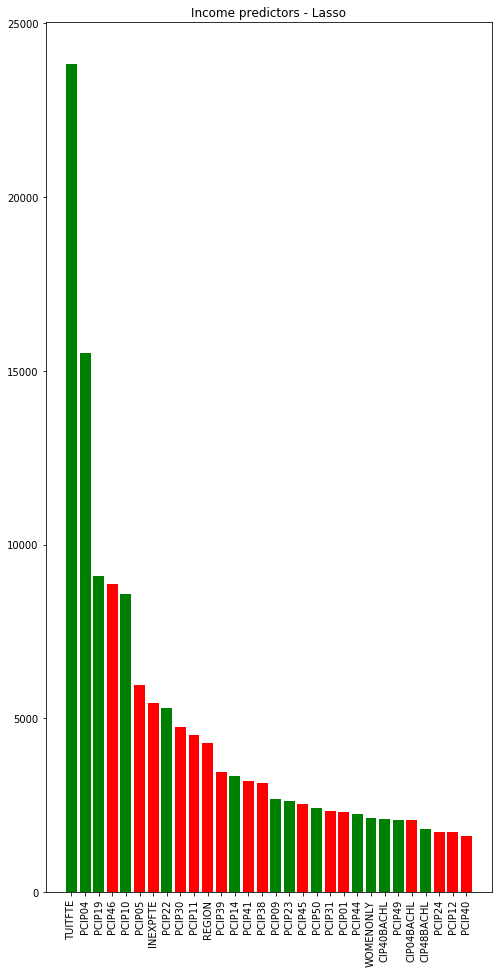

In [134]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Lasso")
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)

plt.show()
fig.savefig(path2 + 'lasso_debt_predictor.png', format = 'png' , bbox_inches='tight')

In [135]:
from sklearn.feature_selection import RFE

In [136]:
number_features = 30
rfe = RFE(estimator = model, n_features_to_select = number_features,  step=1)

In [137]:
y_test.ravel()

array([19000, 19500, 12695, 19500, 12574, 10092, 14495, 23750,  9500,
       18500, 17838,  4500, 14000, 19125, 15622, 12274,  8009, 15000,
       20500, 17500, 12750, 25000, 20000, 14166, 20500,  7364, 19474,
       15502, 17125, 15000, 20500, 18000, 14125, 19500, 13000, 17730,
       19500, 15000, 15900, 18500, 19500, 11490, 18822, 21837, 20000,
       14000, 15760, 24708, 12383, 17750, 20500, 16750, 15000, 16000,
       16750, 18750, 20280, 14000, 14250, 17750, 12375, 24500, 15150,
        9246, 19500, 16750, 17000, 19000, 24155,  8292, 11468, 16750,
       16432, 11700, 14000, 20500, 15000, 18532, 11000, 15000, 12667,
        5000, 15000, 14800, 14778, 14091, 19500, 15000, 14500, 12250,
        9500, 20500, 25000, 12129, 12667, 22250, 26884, 12870, 20875,
       16372, 17750, 25000, 18875, 19500, 15760,  9321, 20210, 16200,
       13000, 14000, 18500, 20500, 17166, 16250, 11774, 24464,  9500,
       10000, 21000, 14055, 14000, 20387, 15750, 14000, 23989, 18326,
       12000, 21500,

In [138]:
results = rfe.fit(X_test, y_test)

C:\Users\thead\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
results.score(X_test, y_test)

0.41494132105438775

In [140]:
results.ranking_

array([15, 24, 11, 20, 30, 28, 18, 43,  1,  3,  7, 16, 33, 12, 19, 31,  2,
        1, 42, 36, 48,  1, 37, 13, 26, 17, 27,  1, 32,  1, 53, 35, 29,  4,
       21,  8, 23, 38, 14,  1,  1,  1,  1,  1,  1,  1, 45, 25,  6,  1,  9,
        1,  1,  1, 10,  1, 22,  5, 50, 34,  1, 41,  1,  1,  1,  1, 39,  1,
       51,  1, 47, 40, 44, 46, 52,  1,  1, 49,  1,  1,  1,  1])

In [141]:
results.support_

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
       False,  True, False, False, False, False,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
        True])

In [142]:
lasso_results = {'results_value':results.ranking_, 'results_keep':results.support_, 'columns': columns, 'coefficient': lasso_a.coef_}

In [143]:
lasso_results_df = pd.DataFrame(data = lasso_results)

In [144]:
lasso_results_df['abs(coef_)'] = np.abs(lasso_results_df['coefficient'])
lasso_results_df

,results_value,results_keep,columns,coefficient,abs(coef_)
0,15,False,CIP01BACHL,-121.288034,121.288034
1,24,False,CIP04BACHL,-2082.767579,2082.767579
2,11,False,CIP05BACHL,351.072889,351.072889
3,20,False,CIP26BACHL,-1568.927789,1568.927789
4,30,False,CIP52BACHL,-1504.628207,1504.628207
...,...,...,...,...,...
77,49,False,WOMENONLY,2136.409938,2136.409938
78,1,True,INEXPFTE,-5443.391119,5443.391119
79,1,True,LOCALE,-249.132761,249.132761
80,1,True,TUITFTE,23781.490909,23781.490909


In [145]:
lasso_results_sorted_df = lasso_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False).head(number_features)

In [146]:
lasso_results_sorted_df

,results_value,results_keep,columns,coefficient,abs(coef_)
80,1,True,TUITFTE,23781.490909,23781.490909
39,1,True,PCIP04,16344.332581,16344.332581
51,1,True,PCIP19,9815.615140,9815.615140
44,1,True,PCIP10,9001.375194,9001.375194
46,45,False,PCIP46,-8776.656892,8776.656892
40,1,True,PCIP05,-5869.330503,5869.330503
56,22,False,PCIP22,5676.346735,5676.346735
78,1,True,INEXPFTE,-5443.391119,5443.391119
81,1,True,REGION,-4281.919784,4281.919784
49,1,True,PCIP14,4217.438854,4217.438854


In [147]:
lasso_results_sorted_stack = lasso_results_sorted_df['coefficient']
mask = lasso_results_sorted_stack > 0


In [148]:
x = lasso_results_sorted_df['columns']
y = np.abs(lasso_results_sorted_df['coefficient'])

In [149]:
mask.values

array([ True,  True,  True,  True, False, False,  True, False, False,
        True, False, False,  True, False,  True,  True,  True, False,
        True, False,  True,  True, False,  True, False, False, False,
       False, False, False])

In [150]:
x.to_list()

['TUITFTE',
 'PCIP04',
 'PCIP19',
 'PCIP10',
 'PCIP46',
 'PCIP05',
 'PCIP22',
 'INEXPFTE',
 'REGION',
 'PCIP14',
 'PCIP30',
 'PCIP11',
 'PCIP50',
 'PCIP41',
 'PCIP09',
 'PCIP44',
 'PCIP23',
 'PCIP39',
 'PCIP49',
 'PCIP38',
 'CIP40BACHL',
 'WOMENONLY',
 'CIP04BACHL',
 'CIP48BACHL',
 'PCIP01',
 'PCIP31',
 'PCIP45',
 'CIP26BACHL',
 'CIP52BACHL',
 'PCIP40']

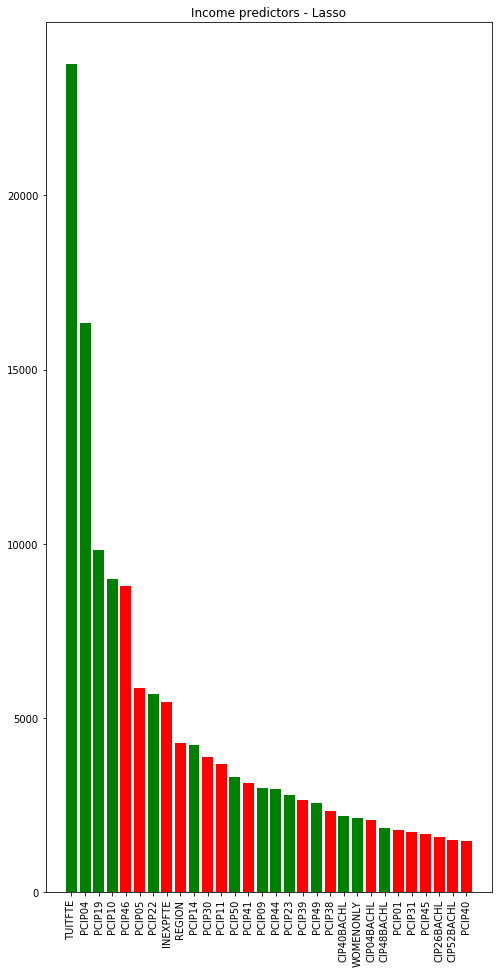

In [151]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Lasso")
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)

plt.show()
fig.savefig(path2 + 'lasso_major_income_predictor.png', format = 'png' , bbox_inches='tight')

In [152]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,TUITFTE,0.373316,tuition_revenue_per_fte,235 Net tuition revenue per full-time equiv...,"235 school Name: dev-category, dtype: object"
1,INEXPFTE,0.252132,instructional_expenditure_per_fte,233 Instructional expenditures per full-tim...,"233 school Name: dev-category, dtype: object"
2,REGION,0.164920,region_id,237 Region (IPEDS) Name: NAME OF DATA ELEME...,"237 school Name: dev-category, dtype: object"
3,PCIP45,0.075397,program_percentage.social_science,72 Percentage of degrees awarded in Social ...,"72 academics Name: dev-category, dtype: object"
4,PCIP16,0.038064,program_percentage.language,52 Percentage of degrees awarded in Foreign...,"52 academics Name: dev-category, dtype: object"
5,CIP52BACHL,0.034714,program.bachelors.business_marketing,"4 Bachelor's degree in Business, Management...","4 academics Name: dev-category, dtype: object"
6,PCIP03,0.031357,program_percentage.resources,63 Percentage of degrees awarded in Natural...,"63 academics Name: dev-category, dtype: object"
7,CIP51BACHL,0.030101,program.bachelors.health,15 Bachelor's degree in Health Professions ...,"15 academics Name: dev-category, dtype: object"


In [153]:
#now lets do the elastic net model

In [154]:
X = X_base_line
y = y_baseline

In [155]:
#not supposed to be here.  Should have been dropped.  All RPY column values
#X['IND_RPY_1YR_RT']


In [156]:
columns = X.columns.to_list()

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [158]:
y_train_nat = y_train

In [159]:
y_train = y_train.ravel().reshape(1,-1)

In [160]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

In [161]:
y_test = y_test.ravel().reshape(-1, 1)
y_test

array([[19000],
       [19500],
       [12695],
       [19500],
       [12574],
       [10092],
       [14495],
       [23750],
       [ 9500],
       [18500],
       [17838],
       [ 4500],
       [14000],
       [19125],
       [15622],
       [12274],
       [ 8009],
       [15000],
       [20500],
       [17500],
       [12750],
       [25000],
       [20000],
       [14166],
       [20500],
       [ 7364],
       [19474],
       [15502],
       [17125],
       [15000],
       [20500],
       [18000],
       [14125],
       [19500],
       [13000],
       [17730],
       [19500],
       [15000],
       [15900],
       [18500],
       [19500],
       [11490],
       [18822],
       [21837],
       [20000],
       [14000],
       [15760],
       [24708],
       [12383],
       [17750],
       [20500],
       [16750],
       [15000],
       [16000],
       [16750],
       [18750],
       [20280],
       [14000],
       [14250],
       [17750],
       [12375],
       [24500],
       [

In [162]:
X_train = X_scaler.transform(X_train)
#y_train =  y_scaler.transform(y_train)
X_test =  X_scaler.transform(X_test)
#y_test = y_scaler.transform(y_test)

In [163]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.05,l1_ratio = .4,  max_iter = 10000, tol = .1)

In [164]:
y_test

array([[19000],
       [19500],
       [12695],
       [19500],
       [12574],
       [10092],
       [14495],
       [23750],
       [ 9500],
       [18500],
       [17838],
       [ 4500],
       [14000],
       [19125],
       [15622],
       [12274],
       [ 8009],
       [15000],
       [20500],
       [17500],
       [12750],
       [25000],
       [20000],
       [14166],
       [20500],
       [ 7364],
       [19474],
       [15502],
       [17125],
       [15000],
       [20500],
       [18000],
       [14125],
       [19500],
       [13000],
       [17730],
       [19500],
       [15000],
       [15900],
       [18500],
       [19500],
       [11490],
       [18822],
       [21837],
       [20000],
       [14000],
       [15760],
       [24708],
       [12383],
       [17750],
       [20500],
       [16750],
       [15000],
       [16000],
       [16750],
       [18750],
       [20280],
       [14000],
       [14250],
       [17750],
       [12375],
       [24500],
       [

In [165]:
elastic_net = model.fit(X_train, y_train.ravel())
elastic_net  = model.score(X_test, y_test)
elastic_net

0.1933921651563565

In [166]:
alpha = [0.01, .05, .1, .15, .2, .4, .6, .8, 1]
l1_ratio = [0, .2, .4, .6, .8, 1]
# Maximum number of levels in tree
fit_intercept = [True, False]
normalize = [True, False]
warm_start = [True, False]
selection = ['cyclic', 'random']
random_state = [10]

random_grid = {'alpha': alpha,
               'l1_ratio': l1_ratio,
               'fit_intercept' : fit_intercept,
               'normalize': normalize,
               'warm_start': warm_start,
               'selection': selection,
               'random_state': random_state}
random_grid

{'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1],
 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
 'fit_intercept': [True, False],
 'normalize': [True, False],
 'warm_start': [True, False],
 'selection': ['cyclic', 'random'],
 'random_state': [10]}

In [167]:
elastic_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [168]:
elastic_random.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.5s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [169]:
predicted_y = elastic_random.predict(X_test)

In [170]:
elastic_random.score(X_test, y_test)

0.06436355375477665

In [171]:
elastic_random

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [172]:
elastic_random.best_estimator_

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [173]:
model_best =elastic_random.best_estimator_

In [174]:
model_best.fit(X_train, y_train.ravel())


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=10, selection='random', tol=0.1, warm_start=False)

In [175]:
model_best.coef_

array([-6.45517723e+02, -1.13230273e+03,  5.09151722e+01, -1.70261460e+03,
       -1.48514021e+03,  6.54873192e+02,  9.09174150e+02, -1.40641533e+02,
       -4.35767449e+02, -8.44700742e+02, -7.08123764e+02,  5.48907123e+02,
        1.68041114e+02, -7.03039968e+02,  1.06228180e+03, -1.16621732e+02,
        7.47130257e+02, -8.19975406e+02, -6.92576074e+02,  1.46911457e+02,
       -6.65937156e+02, -6.16119568e+01, -4.78724687e+02, -9.01772716e+02,
        6.64710179e+01,  9.74685478e+02,  2.23568549e+02, -1.30767513e+03,
        1.20626506e+03,  2.09262212e+03,  1.33069232e+03, -4.03931376e+02,
       -3.16476536e+01, -1.03070247e+03,  5.59892117e+02,  1.30059569e+03,
       -2.94076258e+02,  4.84647293e+02, -1.22717540e+03,  7.07458013e+03,
       -4.24917641e+03, -6.65096033e+02,  1.69326041e+02,  2.28632081e+03,
        4.18194778e+03, -2.44952679e+03, -3.06246069e+03, -9.20392942e+02,
        2.24395549e+02,  2.37066639e+03,  1.86624166e+03,  3.91031507e+03,
       -6.50319665e+02,  

In [176]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.30434783, 0.07054012,
        0.5       ],
       [0.        , 0.        , 0.5       , ..., 0.7826087 , 0.0708319 ,
        0.375     ],
       [0.        , 0.        , 0.5       , ..., 0.30434783, 0.09909689,
        0.875     ],
       ...,
       [0.5       , 0.        , 0.        , ..., 0.52173913, 0.05447341,
        0.25      ],
       [0.        , 0.        , 0.5       , ..., 0.32608696, 0.0271167 ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.7826087 , 0.02810969,
        0.375     ]])

In [177]:
#columns = X.columns

In [178]:
elasticnet_results = {'columns': columns, 'coefficient': model_best.coef_}

In [179]:
elasticnet_results_df = pd.DataFrame(data = elasticnet_results)

In [180]:
elasticnet_results_df['abs(coef_)'] = np.abs(elasticnet_results_df['coefficient'])

In [181]:
number_of_features = 30
elasticnet_results_df = elasticnet_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False).head(number_of_features)

In [182]:
elasticnet_results_df

,columns,coefficient,abs(coef_)
80,TUITFTE,10731.236225,10731.236225
39,PCIP04,7074.580126,7074.580126
81,REGION,-4420.249803,4420.249803
40,PCIP05,-4249.176407,4249.176407
44,PCIP10,4181.947784,4181.947784
51,PCIP19,3910.315072,3910.315072
73,PCIP39,-3747.603803,3747.603803
46,PCIP46,-3062.460695,3062.460695
62,PCIP30,-2945.580708,2945.580708
75,PCIP50,2582.970729,2582.970729


In [183]:
mask = elasticnet_results_df['coefficient'] > 0

In [184]:
x = elasticnet_results_df['columns']
y = elasticnet_results_df['abs(coef_)']

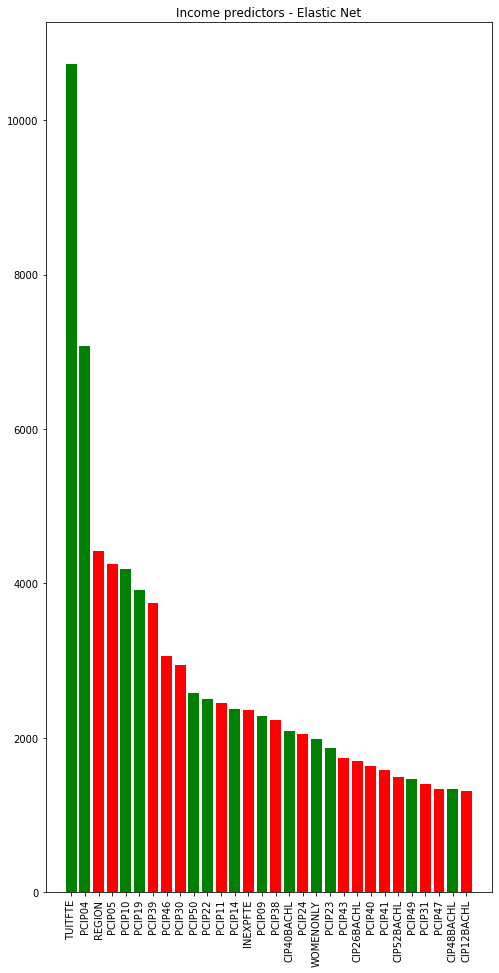

In [185]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Elastic Net")
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)

plt.show()
fig.savefig(path2 + 'elastic_net_debt_predictor.png', format = 'png' , bbox_inches='tight')